# Finding Fatalities in the Israeli-Palestinian Dataset
https://www.kaggle.com/datasets/willianoliveiragibin/fatalities-in-the-israeli-palestinian

# Import Libraries

In [1]:
#importing the important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Read Data

In [2]:
# Load the dataset
data = pd.read_csv('fatalities_isr_pse_conflict_2000_to_2023.csv')

# EDA

In [3]:
data.head()

,name,date_of_event,age,citizenship,event_location,event_location_district,event_location_region,date_of_death,gender,took_part_in_the_hostilities,place_of_residence,place_of_residence_district,type_of_injury,ammunition,killed_by,notes
0,'Abd a-Rahman Suleiman Muhammad Abu Daghash,2023-09-24,32.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,M,NaN,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while standing ...
1,Usayed Farhan Muhammad 'Ali Abu 'Ali,2023-09-24,21.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,M,NaN,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while trying to...
2,'Abdallah 'Imad Sa'ed Abu Hassan,2023-09-22,16.0,Palestinian,Kfar Dan,Jenin,West Bank,2023-09-22,M,NaN,al-Yamun,Jenin,gunfire,live ammunition,Israeli security forces,Fatally shot by soldiers while firing at them ...
3,Durgham Muhammad Yihya al-Akhras,2023-09-20,19.0,Palestinian,'Aqbat Jaber R.C.,Jericho,West Bank,2023-09-20,M,NaN,'Aqbat Jaber R.C.,Jericho,gunfire,live ammunition,Israeli security forces,Shot in the head by Israeli forces while throw...
4,Raafat 'Omar Ahmad Khamaisah,2023-09-19,15.0,Palestinian,Jenin R.C.,Jenin,West Bank,2023-09-19,M,NaN,Jenin,Jenin,gunfire,live ammunition,Israeli security forces,Wounded by soldiers’ gunfire after running awa...


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11124 entries, 0 to 11123
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   name                          11124 non-null  object 
 1   date_of_event                 11124 non-null  object 
 2   age                           10995 non-null  float64
 3   citizenship                   11124 non-null  object 
 4   event_location                11124 non-null  object 
 5   event_location_district       11124 non-null  object 
 6   event_location_region         11124 non-null  object 
 7   date_of_death                 11124 non-null  object 
 8   gender                        11104 non-null  object 
 9   took_part_in_the_hostilities  9694 non-null   object 
 10  place_of_residence            11056 non-null  object 
 11  place_of_residence_district   11056 non-null  object 
 12  type_of_injury                10833 non-null  object 
 13  a

In [5]:
data.columns

Index(['name', 'date_of_event', 'age', 'citizenship', 'event_location',
       'event_location_district', 'event_location_region', 'date_of_death',
       'gender', 'took_part_in_the_hostilities', 'place_of_residence',
       'place_of_residence_district', 'type_of_injury', 'ammunition',
       'killed_by', 'notes'],
      dtype='object')

In [6]:
data.columns = ['name', 'date_of_event', 'age', 'citizenship', 'place', 'district', 'region', 'date_of_death',
                'gender', 'took_part_in_the_hostilities', 'place_of_residence', 'place_of_residence_district', 
                'dead_reason', 'ammunition', 'killed_by','notes']

In [7]:
data.notes

0        Fatally shot by Israeli forces while standing ...
1        Fatally shot by Israeli forces while trying to...
2        Fatally shot by soldiers while firing at them ...
3        Shot in the head by Israeli forces while throw...
4        Wounded by soldiers’ gunfire after running awa...
                               ...                        
11119                    Killed while hiking on Mt. Eival.
11120    Killed by a settler from Itamar while harvesti...
11121       His body was found a day after he disappeared.
11122     Killed by settlers who rioted in Biddya village.
11123                                                  NaN
Name: notes, Length: 11124, dtype: object

In [8]:
# Drop unnecessary columns
data.drop(columns = 'notes',inplace = True)

## Checking for the Duplicate Values in the data set

In [9]:
data[data.duplicated() == True]

,name,date_of_event,age,citizenship,place,district,region,date_of_death,gender,took_part_in_the_hostilities,place_of_residence,place_of_residence_district,dead_reason,ammunition,killed_by
2018,Yusef Mahmoud Rizeq Abu Taha,2014-08-02,9.0,Palestinian,Rafah,Rafah,Gaza Strip,2014-08-02,M,No,Rafah,Rafah,gunfire,NaN,Israeli security forces
2027,Muhammad Mahmoud Rizeq Abu Taha,2014-08-02,12.0,Palestinian,Rafah,Rafah,Gaza Strip,2014-08-02,M,No,Rafah,Rafah,gunfire,NaN,Israeli security forces
2029,Sa'diyah Rizeq 'Abd a-Razeq Abu Taha,2014-08-02,40.0,Palestinian,Rafah,Rafah,Gaza Strip,2014-08-02,F,No,Rafah,Rafah,gunfire,NaN,Israeli security forces
2042,Rizeq Isma'il 'Ali Abu Taha,2014-08-02,NaN,Palestinian,Rafah,Rafah,Gaza Strip,2014-08-02,M,No,Rafah,Rafah,gunfire,NaN,Israeli security forces
6241,Muhannad 'Omar Muhammad a-Nashasi,2008-03-01,20.0,Palestinian,Jabalya,North Gaza,Gaza Strip,2008-03-01,M,Yes,Gaza city,Gaza,gunfire,missile,Israeli security forces
9373,Name unknown to B'Tselem,2003-01-13,NaN,Palestinian,Nitzana,Israel,Israel,2003-01-13,M,Yes,NaN,NaN,gunfire,NaN,Israeli security forces
9985,Name unknown to B'Tselem,2002-05-05,NaN,Palestinian,Karni Checkpoint,Gaza,Gaza Strip,2002-05-05,NaN,Unknown,NaN,NaN,gunfire,NaN,Israeli security forces
9986,Name unknown to B'Tselem,2002-05-05,NaN,Palestinian,Kissufim,Khan Yunis,Gaza Strip,2002-05-05,NaN,Yes,NaN,NaN,gunfire,NaN,Israeli security forces
10234,Name unknown to B'Tselem,2002-04-01,NaN,Palestinian,Jenin R.C.,Jenin,West Bank,2002-04-01,NaN,Unknown,NaN,NaN,NaN,NaN,Israeli security forces
10817,Name unknown to B'Tselem,2001-12-02,NaN,Palestinian,Jenin,Jenin,West Bank,2001-12-02,NaN,Unknown,NaN,NaN,gunfire,NaN,Israeli security forces


In [10]:
data[data.name == 'Yusef Mahmoud Rizeq Abu Taha']

,name,date_of_event,age,citizenship,place,district,region,date_of_death,gender,took_part_in_the_hostilities,place_of_residence,place_of_residence_district,dead_reason,ammunition,killed_by
1987,Yusef Mahmoud Rizeq Abu Taha,2014-08-02,9.0,Palestinian,Rafah,Rafah,Gaza Strip,2014-08-02,M,No,Rafah,Rafah,gunfire,NaN,Israeli security forces
2018,Yusef Mahmoud Rizeq Abu Taha,2014-08-02,9.0,Palestinian,Rafah,Rafah,Gaza Strip,2014-08-02,M,No,Rafah,Rafah,gunfire,NaN,Israeli security forces


In [11]:
# Dropping Duplicate Values
data.drop_duplicates(keep = 'first',inplace = True)

In [12]:
data[data.name == 'Yusef Mahmoud Rizeq Abu Taha']

,name,date_of_event,age,citizenship,place,district,region,date_of_death,gender,took_part_in_the_hostilities,place_of_residence,place_of_residence_district,dead_reason,ammunition,killed_by
1987,Yusef Mahmoud Rizeq Abu Taha,2014-08-02,9.0,Palestinian,Rafah,Rafah,Gaza Strip,2014-08-02,M,No,Rafah,Rafah,gunfire,NaN,Israeli security forces


### Dealing with null values

In [13]:
data.isnull().sum()

name                               0
date_of_event                      0
age                              121
citizenship                        0
place                              0
district                           0
region                             0
date_of_death                      0
gender                            14
took_part_in_the_hostilities    1430
place_of_residence                61
place_of_residence_district       61
dead_reason                      290
ammunition                      5242
killed_by                          0
dtype: int64

In [14]:
data.gender.unique()

array(['M', 'F', nan], dtype=object)

In [15]:
gender_mode = data.gender.mode()
print(gender_mode[0])

M


In [16]:
data['gender'].fillna(gender_mode[0], inplace = True)

In [17]:
data.gender.isnull().sum()

0

In [18]:
data.gender.unique()

array(['M', 'F'], dtype=object)

In [19]:
male_mean_age = round(data.loc[data.gender == 'M']['age'].median())
female_mean_age = round(data.loc[data.gender == 'F']['age'].median())
print('Median for the Male:', male_mean_age)
print('Median for the female:', female_mean_age)

Median for the Male: 23
Median for the female: 26


In [20]:
data.loc[data['gender'] == 'M', 'age'] = data.loc[data.gender == 'M']['age'].fillna(male_mean_age)
data.loc[data['gender'] == 'F', 'age'] = data.loc[data.gender == 'F']['age'].fillna(female_mean_age)

In [21]:
data.isnull().sum()

name                               0
date_of_event                      0
age                                0
citizenship                        0
place                              0
district                           0
region                             0
date_of_death                      0
gender                             0
took_part_in_the_hostilities    1430
place_of_residence                61
place_of_residence_district       61
dead_reason                      290
ammunition                      5242
killed_by                          0
dtype: int64

In [22]:
data.took_part_in_the_hostilities.unique()

array([nan, 'No', 'Yes', 'Unknown', 'Israelis',
       'Object of targeted killing'], dtype=object)

In [23]:
took_part_in_hostilities = data['took_part_in_the_hostilities'].mode()
data['took_part_in_the_hostilities'].fillna(took_part_in_hostilities[0],inplace = True)

In [24]:
print(data.took_part_in_the_hostilities.isnull().sum())

0


In [25]:
residence_place = data.place_of_residence.mode()
print(residence_place)

data['place_of_residence'].fillna(residence_place[0],inplace = True)
print(data.place_of_residence.isnull().sum())

0    Gaza city
Name: place_of_residence, dtype: object
0


In [26]:
residence_district = data.place_of_residence_district.mode()
print(residence_district)

data['place_of_residence_district'].fillna(residence_district[0],inplace = True)
print(data.place_of_residence_district.isnull().sum())

0    Gaza
Name: place_of_residence_district, dtype: object
0


In [27]:
dead_reason = data.dead_reason.value_counts().reset_index()
dead_reason.columns = ['dead_reason','count']
dead_reason

,dead_reason,count
0,gunfire,9838
1,explosion,555
2,shelling,311
3,stabbing,48
4,house demolition,25
5,hit by a vehicle,18
6,beating,9
7,stones throwing,6
8,being bludgeoned with an axe,4
9,fire,4


In [28]:
dead = data.dead_reason.mode()
print(dead)

data['dead_reason'].fillna(dead[0],inplace = True)
print(data.dead_reason.isnull().sum())

0    gunfire
Name: dead_reason, dtype: object
0


In [29]:
data.ammunition.isnull().sum()

5242

In [30]:
print(((5242 / 11112) * 100))

47.17422606191505


In [31]:
#  As Ammunition has 47% missing value we will drop this column
data.drop(columns = 'ammunition',inplace = True)

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11112 entries, 0 to 11123
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   name                          11112 non-null  object 
 1   date_of_event                 11112 non-null  object 
 2   age                           11112 non-null  float64
 3   citizenship                   11112 non-null  object 
 4   place                         11112 non-null  object 
 5   district                      11112 non-null  object 
 6   region                        11112 non-null  object 
 7   date_of_death                 11112 non-null  object 
 8   gender                        11112 non-null  object 
 9   took_part_in_the_hostilities  11112 non-null  object 
 10  place_of_residence            11112 non-null  object 
 11  place_of_residence_district   11112 non-null  object 
 12  dead_reason                   11112 non-null  object 
 13  killed

### Dealing with Outliers

In [33]:
data.age.describe()

count    11112.000000
mean        26.715083
std         13.709583
min          1.000000
25%         19.000000
50%         23.000000
75%         31.000000
max        112.000000
Name: age, dtype: float64

In [34]:
fig = px.box(data, x = 'age')
fig.show()

In [35]:
q1 = data['age'].quantile(.25)
q3 = data['age'].quantile(.75)
iqr = q3-q1
upper = q3 + (1.5 * iqr)
lower = q1 - (1.5 * iqr)
upper,lower

(49.0, 1.0)

In [36]:
outliers = data.loc[((data['age'] > upper) | (data['age'] < lower) )] 

In [37]:
# This is the list of outliers but this is real ages and we can't remove this data because this is real data
outliers

,name,date_of_event,age,citizenship,place,district,region,date_of_death,gender,took_part_in_the_hostilities,place_of_residence,place_of_residence_district,dead_reason,killed_by
18,Shai Silas Nigerker,2023-08-19,60.0,Israeli,Huwarah,Nablus,West Bank,2023-08-19,M,No,Ashdod,Israel,gunfire,Palestinian civilians
71,Ofer Fairman,2023-06-20,64.0,Israeli,Eli,Nablus,West Bank,2023-06-20,M,No,Eli,Nablus,gunfire,Palestinian civilians
94,Iyad al-'Abed al-Hasani,2023-05-12,51.0,Palestinian,Gaza City,Gaza,Gaza Strip,2023-05-12,M,Yes,a-Shati' Camp,Gaza,gunfire,Israeli security forces
97,Ghazi Yusef Mustafa Shihab,2023-05-11,66.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-05-11,M,No,Nur Shams R.C.,Tulkarm,gunfire,Israeli security forces
99,Inga Avramyan,2023-05-11,82.0,Israeli,Rehovot,Israel,Israel,2023-05-11,F,No,Rehovot,Israel,gunfire,Palestinian civilians
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11074,Naftali Dean,2001-03-04,85.0,Israeli,Netanya,Israel,Israel,2001-03-04,M,Israelis,Tel Mond,Israel,explosion,Palestinian civilians
11075,Shlomit Ziv,2001-03-04,59.0,Israeli,Netanya,Israel,Israel,2001-03-04,F,Israelis,Netanya,Israel,explosion,Palestinian civilians
11076,Yevgenya Malchin,2001-03-04,71.0,Israeli,Netanya,Israel,Israel,2001-03-04,F,Israelis,Netanya,Israel,explosion,Palestinian civilians
11083,Arye Hershkwitz,2001-01-29,55.0,Israeli,'Atarot,Ramallah and al-Bira,West Bank,2001-01-29,M,Israelis,Ofra,Ramallah and al-Bira,gunfire,Palestinian civilians


In [38]:
data['date_of_event'] = pd.to_datetime(data['date_of_event'])
data['date_of_death'] = pd.to_datetime(data['date_of_death'])

In [39]:
data.head()

,name,date_of_event,age,citizenship,place,district,region,date_of_death,gender,took_part_in_the_hostilities,place_of_residence,place_of_residence_district,dead_reason,killed_by
0,'Abd a-Rahman Suleiman Muhammad Abu Daghash,2023-09-24,32.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,M,No,Nur Shams R.C.,Tulkarm,gunfire,Israeli security forces
1,Usayed Farhan Muhammad 'Ali Abu 'Ali,2023-09-24,21.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,M,No,Nur Shams R.C.,Tulkarm,gunfire,Israeli security forces
2,'Abdallah 'Imad Sa'ed Abu Hassan,2023-09-22,16.0,Palestinian,Kfar Dan,Jenin,West Bank,2023-09-22,M,No,al-Yamun,Jenin,gunfire,Israeli security forces
3,Durgham Muhammad Yihya al-Akhras,2023-09-20,19.0,Palestinian,'Aqbat Jaber R.C.,Jericho,West Bank,2023-09-20,M,No,'Aqbat Jaber R.C.,Jericho,gunfire,Israeli security forces
4,Raafat 'Omar Ahmad Khamaisah,2023-09-19,15.0,Palestinian,Jenin R.C.,Jenin,West Bank,2023-09-19,M,No,Jenin,Jenin,gunfire,Israeli security forces


# Some Visualization

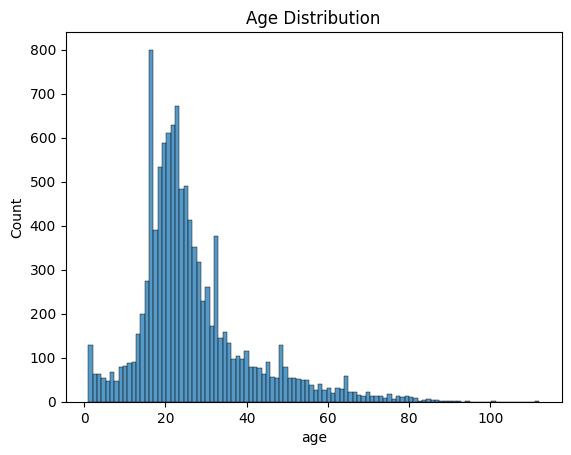

In [40]:
sns.histplot(x = 'age',data = data,stat = 'count')
plt.title('Age Distribution')
plt.show()

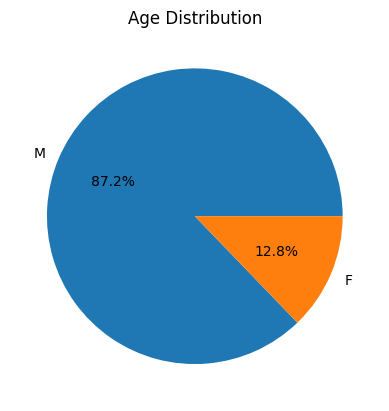

In [41]:
plt.pie(data['gender'].value_counts().values, labels =data['gender'].value_counts().index, autopct = '%.1f%%')
plt.title('Age Distribution')
plt.show()

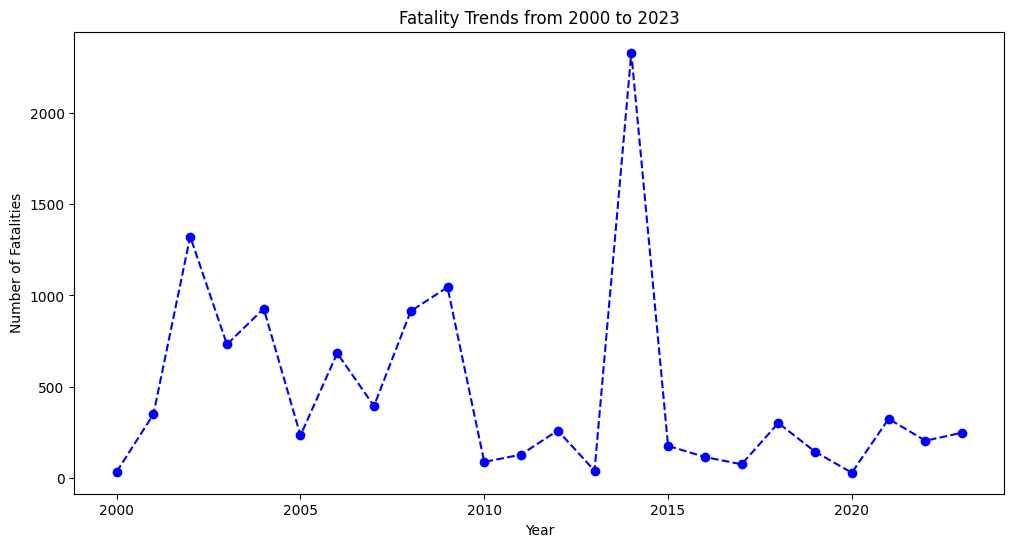

In [42]:
fatality_by_year = data.groupby(data['date_of_event'].dt.year).size().reset_index(name='fatalities')

plt.figure(figsize=(12, 6))
plt.plot(fatality_by_year['date_of_event'], fatality_by_year['fatalities'], marker='o', color='blue', linestyle='--')
plt.title('Fatality Trends from 2000 to 2023')
plt.xlabel('Year')
plt.ylabel('Number of Fatalities')
plt.show()

### Top 10 Event Locations

In [43]:
top_10_locations = data["district"].value_counts().head(10).index

israeli_data = data[data["citizenship"] == "Israeli"]
palestinian_data = data[data["citizenship"] == "Palestinian"]

israeli_filtered = israeli_data[israeli_data["district"].isin(top_10_locations)]
palestinian_filtered = palestinian_data[palestinian_data["district"].isin(top_10_locations)]

israeli_counts = israeli_filtered["district"].value_counts()
palestinian_counts = palestinian_filtered["district"].value_counts()

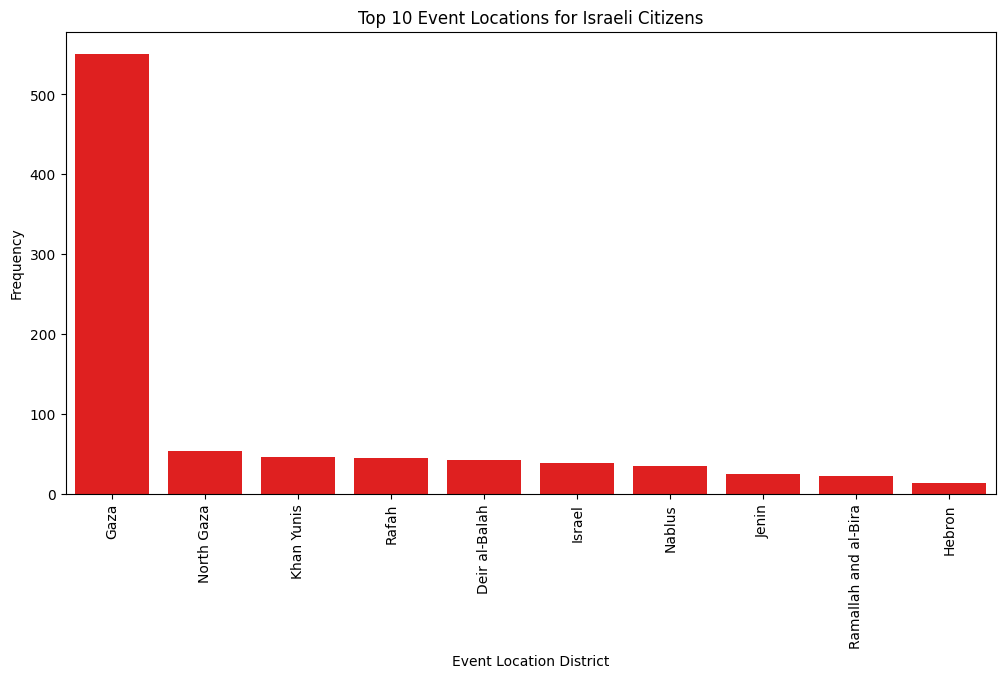

In [44]:
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_locations, y=israeli_counts, color="red")
plt.xticks(rotation=90)
plt.xlabel("Event Location District")
plt.ylabel("Frequency")
plt.title("Top 10 Event Locations for Israeli Citizens")
plt.show()

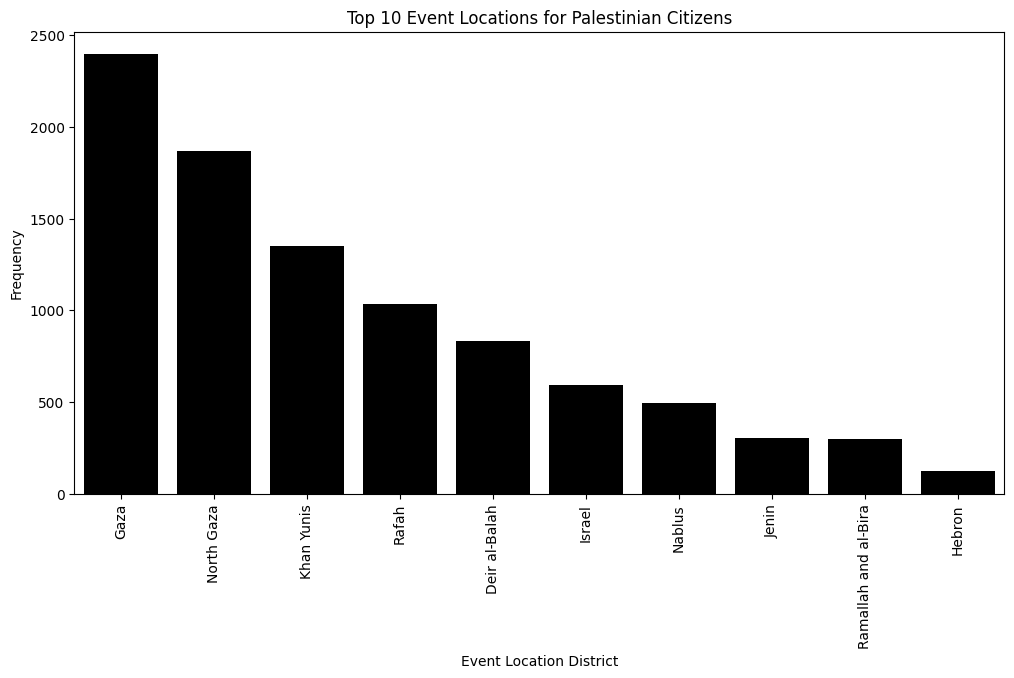

In [45]:
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_locations, y=palestinian_counts, color="black")
plt.xticks(rotation=90)
plt.xlabel("Event Location District")
plt.ylabel("Frequency")
plt.title("Top 10 Event Locations for Palestinian Citizens")
plt.show()

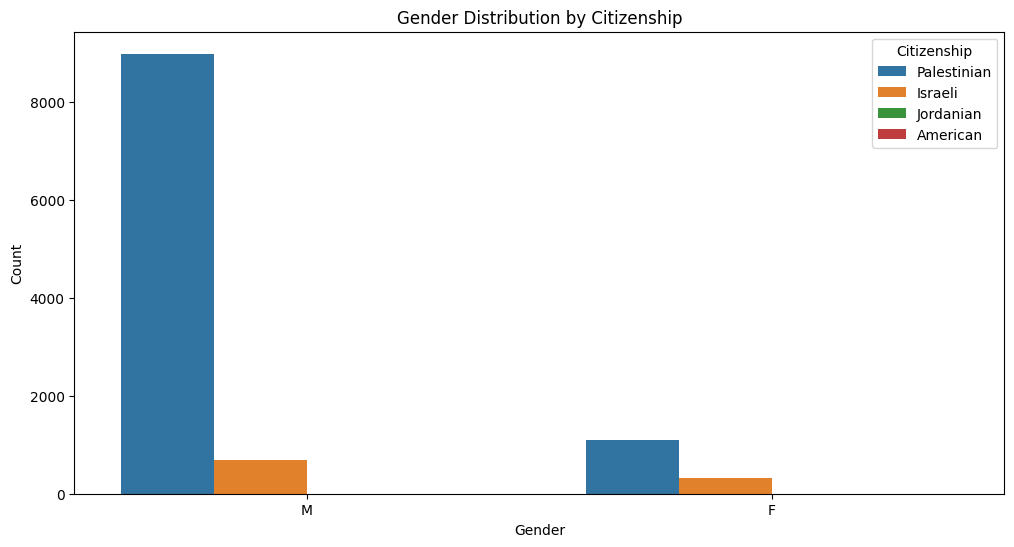

In [46]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x="gender", hue="citizenship")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Gender Distribution by Citizenship")
plt.legend(title="Citizenship")
plt.show()

In [47]:
gender = data.gender.value_counts().reset_index()
gender.columns = ['gender','count']

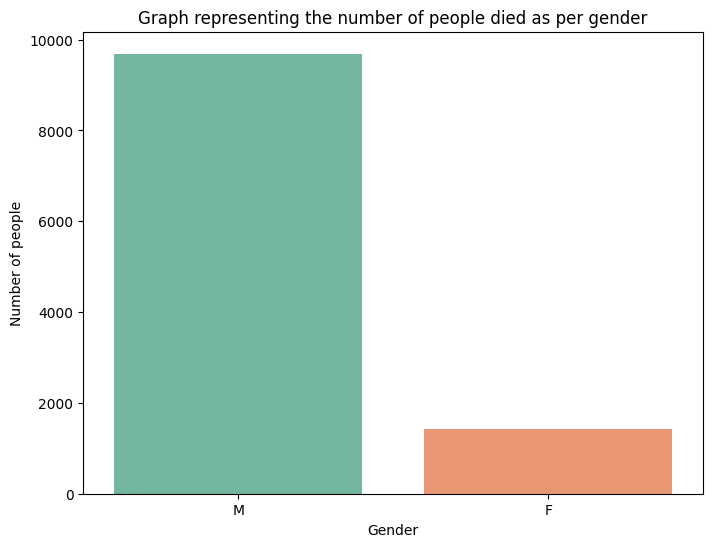

In [48]:
plt.figure(figsize = (8,6))
ax = sns.barplot(x = 'gender',y = 'count',data = gender,palette = 'Set2')
plt.xlabel('Gender')
plt.ylabel('Number of people')
plt.title('Graph representing the number of people died as per gender')
plt.show()

In [49]:
took_part_in_the_hostilities = data.took_part_in_the_hostilities.value_counts().reset_index()
took_part_in_the_hostilities.columns = ['took_part_in_the_hostilities','count']
took_part_in_the_hostilities

,took_part_in_the_hostilities,count
0,No,6079
1,Yes,3464
2,Israelis,771
3,Unknown,598
4,Object of targeted killing,200


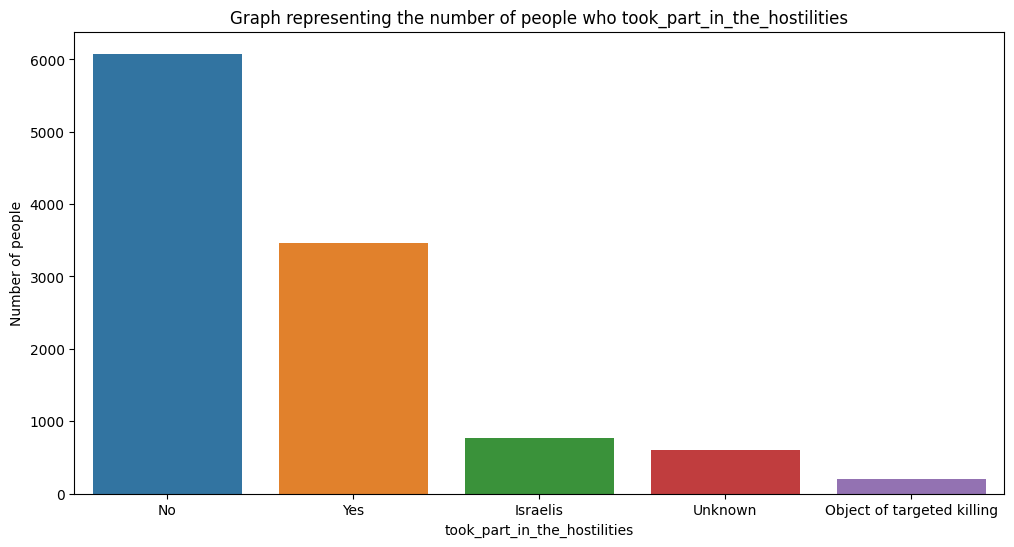

In [50]:
plt.figure(figsize = (12,6))
ax = sns.barplot(x = 'took_part_in_the_hostilities',y = 'count',data = took_part_in_the_hostilities)
plt.xlabel('took_part_in_the_hostilities')
plt.ylabel('Number of people')
plt.title('Graph representing the number of people who took_part_in_the_hostilities')
plt.show()

In [51]:
dead_reason = data.dead_reason.value_counts().reset_index().head(5)
dead_reason.columns = ['dead_reason','count']
dead_reason

,dead_reason,count
0,gunfire,10128
1,explosion,555
2,shelling,311
3,stabbing,48
4,house demolition,25


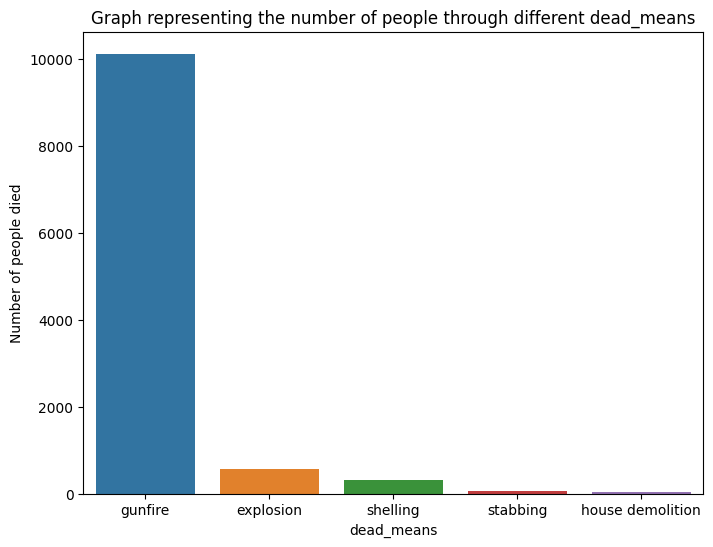

In [52]:
plt.figure(figsize = (8,6))
ax = sns.barplot(x = 'dead_reason',y = 'count',data = dead_reason)
plt.xlabel('dead_means')
plt.ylabel('Number of people died')
plt.title('Graph representing the number of people through different dead_means')
plt.show()

In [53]:
killed_by = data.killed_by.value_counts().reset_index()
killed_by.columns = ['killed_by','count']
killed_by

,killed_by,count
0,Israeli security forces,9988
1,Palestinian civilians,1028
2,Israeli civilians,96


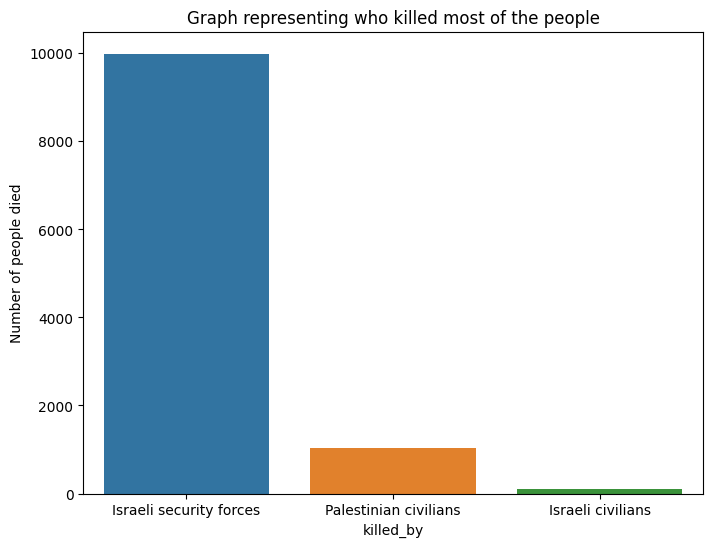

In [54]:
plt.figure(figsize = (8, 6))
ax = sns.barplot(x = 'killed_by',y = 'count',data = killed_by)
plt.xlabel('killed_by')
plt.ylabel('Number of people died')
plt.title('Graph representing who killed most of the people')
plt.show()

In [55]:
region = data.region.value_counts().reset_index()
region.columns = ['region','count']
region

,region,count
0,Gaza Strip,7726
1,West Bank,2708
2,Israel,678


In [56]:
# Save the DataFrame to a CSV file
data.to_csv('output_file.csv', index=False)
